In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from prml.probability_distribution import (
    Binary,
    Multi,
    Gaussian1D,
    plot_student,
    Histgram,
    Parzen,
    KNearestNeighbor,
    KNeighborClassifier
)

# 2.1 Binary Variables

<h3>
    $$Bern(x|\mu) = \mu^x(1-\mu)^{1-x}$$ <br>
    <br>
    $$Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$
</h3>

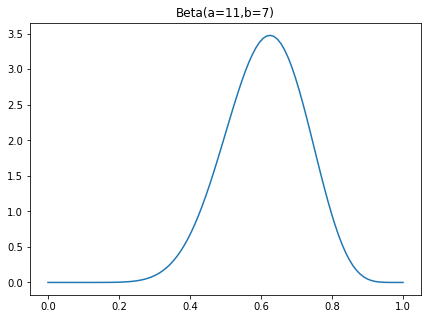

In [2]:
bern = Binary()
X = np.array([1,0,0,0,1,1,1,1,1,1,0,1])
bern.fit(X)
bern.plot()

# 2.2 Multinomial Variables

<h3>
    $$p(\boldsymbol{x}|\boldsymbol{\mu}) = \Pi_{k=1}^K \mu_k^{x_k}$$ <br> 
    <br>
    $$Dir(\boldsymbol{\mu}|\boldsymbol{\alpha}) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1) \cdots \Gamma(\alpha_K)}
    \Pi_{k=1}^K \mu_k^{\alpha_k-1}$$
</h3>

# 2.3 The Gaussian Distribution

<h3>
    $$\mathcal{N}(x|\mu,\sigma^2) = \sqrt{\frac{1}{2\pi\sigma^2}}\exp{(-\frac{(x - \mu)^2}{2\sigma^2})}$$<br>
    <br>
    $$\mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Sigma}) = \sqrt{\frac{1}{(2\pi)^D|\Sigma|}}\exp{(-\frac{1}{2}(\boldsymbol{x} - \boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{x} - \boldsymbol{\mu}))}$$
</h3>

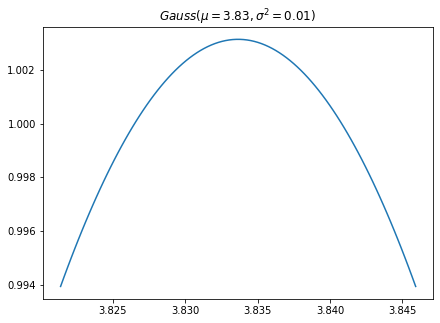

In [3]:
gauss = Gaussian1D()
X = np.random.randn(100) + 4
gauss.fit(X)
gauss.plot()

## Student's t-distribution 

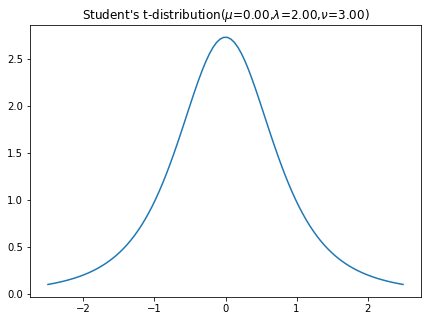

In [4]:
plot_student(mu = 0,lamda = 2,nu = 3)

# 2.5 Nonparametric Methods 

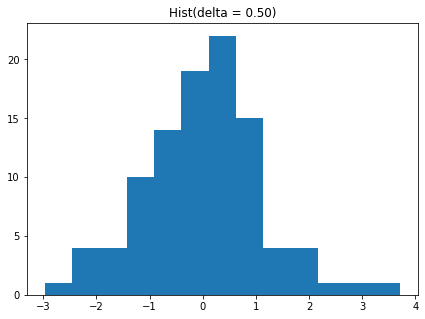

In [5]:
hist = Histgram(delta=5e-1)
X = np.random.randn(100)
hist.fit(X)
hist.plot()

## Kernel density estimators 

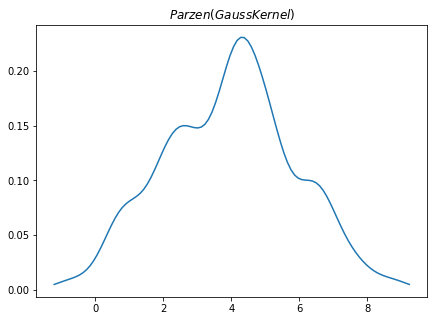

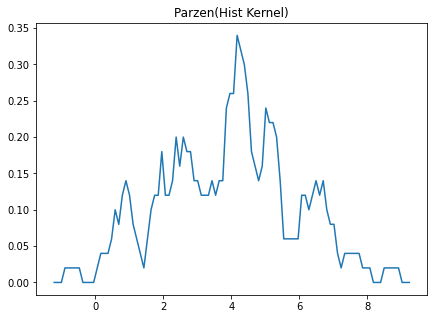

In [6]:
parzen_gauss = Parzen()
X = np.random.randn(100)*2 + 4 
parzen_gauss.fit(X)
parzen_gauss.plot()

parzen_hist = Parzen(kernel = "hist")
parzen_hist.fit(X)
parzen_hist.plot()

## Nearest-neighbor methods

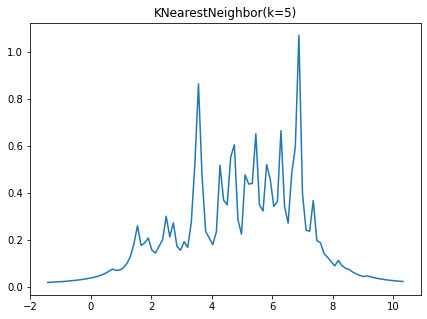

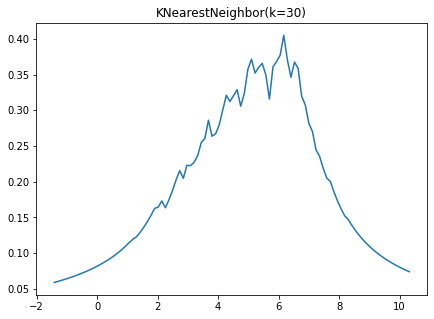

In [7]:
knn5 = KNearestNeighbor(k=5)
knn30 = KNearestNeighbor(k=30)
X = np.random.randn(100)*2.4 + 5.1
knn5.fit(X)
knn5.plot()
knn30.fit(X)
knn30.plot()

In [8]:
def load_iris():
    dict = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2
    }
    X = []
    y = [] 
    with open("../data/iris.data") as f:
        data = f.read()
    
    for line in data.split("\n"):
        # sepal length | sepal width | petal length | petal width 
        if len(line) == 0:
            continue
        sl,sw,pl,pw,cl = line.split(",")
        rec = np.array(list(map(float,(sl,sw,pl,pw))))
        cl = dict[cl]

        X.append(rec)
        y.append(cl)
    return np.array(X),np.array(y)

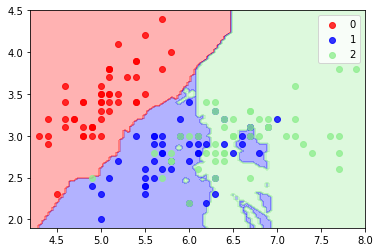

In [10]:
X,y = load_iris()
X = X[:,:2]

knn10 = KNeighborClassifier()
knn10.fit(X,y)
knn10.plot()

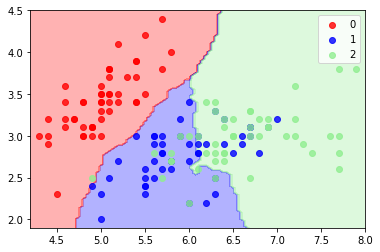

In [11]:
knn30 = KNeighborClassifier(k=30)
knn30.fit(X,y)
knn30.plot()